# Covid-19-Trend-Predictor
#### Prediction of number of Covid-19 cases in India for the next 15 days using LSTM
[Github-Repository](https://github.com/abdulsmapara/Covid-19-Trend-Predictor)


#### Preparing the data

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split
'''
    Reads the data
    
'''

# Read csv file
df = pd.read_csv('../Timeseries-Data/timeseries_data.csv')
# Pick columns required and convert to suitable types
columns_to_keep = ['Date','Index','Location','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df = df.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float})
df = df[columns_to_keep]

# Pick columns to scale
numeric_columns = ['Population_Density','Lockdown','Max_Temp','Min_Temp','Num_Cases']
df_numeric = df[numeric_columns]
df_temp = df[['Min_Temp','Max_Temp']]

# Scale the features appropriately within suitable range
final_temp = []
df_numeric.head()
print('Min', np.min(df_numeric))
print('Max', np.max(df_numeric))
SCALE_NUM_CASES = 300
LOCKDOWN_SCALE = 100
dataset = df_numeric.astype('float64')
scaler = MinMaxScaler(feature_range=(0.0, 1.0))
scaled_data = scaler.fit_transform(dataset)
temp_deno = (np.max(df['Max_Temp']) - np.min(df['Min_Temp']))
temp_num = np.min(df['Min_Temp'])
for ind in df['Index']:
    index = int(ind)
    df.at[index,'Population_Density'] = scaled_data[index][0]
    df.at[index,'Lockdown'] /= LOCKDOWN_SCALE
    df.at[index,'Min_Temp'] = (df.at[index,'Min_Temp'] - temp_num)/ temp_deno
    df.at[index,'Max_Temp'] = (df.at[index,'Max_Temp'] - temp_num)/ temp_deno
df = df.set_index("Date")

# Prepare seperate data for each country
df_final = []
df_final.append(df[df.Location=='Australia'].reset_index(drop=True))
df_final.append(df[df.Location == 'India'].reset_index(drop=True))
df_final.append(df[df.Location == 'China'].reset_index(drop=True))
df_final.append(df[df.Location == 'USA'].reset_index(drop=True))
df_final.append(df[df.Location == 'Italy'].reset_index(drop=True))
df_final.append(df[df.Location == 'France'].reset_index(drop=True))

# Convert cumulative cases to cases per day and scale down
for df_temp in df_final:
    i=0
    for ind in df_temp['Index']:
        df_temp.at[i,'Index'] = i
        i+=1
    for ind in reversed(df_temp['Index']):
        i = int(ind)
        if i != 0:
            df_temp.at[i,'Num_Cases'] -= df_temp.at[i-1,'Num_Cases']
    print(np.max(df_temp['Num_Cases']))
    df_temp['Num_Cases'] /= SCALE_NUM_CASES

# Out India's data
df_final[1]

Min Population_Density    9.0
Lockdown              0.0
Max_Temp              5.0
Min_Temp             -8.0
Num_Cases             0.0
dtype: float64
Max Population_Density      1202.0
Lockdown                 100.0
Max_Temp                  40.0
Min_Temp                  26.0
Num_Cases             187321.0
dtype: float64
573.0
309.0
15133.0
24126.0
6557.0
7578.0


,Index,Location,Population_Density,Min_Temp,Max_Temp,Lockdown,Num_Cases
0,0.0,India,1.0,0.479167,0.645833,0.0,0.000000
1,1.0,India,1.0,0.437500,0.583333,0.0,0.000000
2,2.0,India,1.0,0.416667,0.625000,0.0,0.000000
3,3.0,India,1.0,0.500000,0.625000,0.0,0.000000
4,4.0,India,1.0,0.458333,0.645833,0.0,0.000000
5,5.0,India,1.0,0.458333,0.645833,0.0,0.000000
6,6.0,India,1.0,0.479167,0.562500,0.0,0.000000
7,7.0,India,1.0,0.458333,0.625000,0.0,0.000000
8,8.0,India,1.0,0.458333,0.604167,0.0,0.003333
9,9.0,India,1.0,0.479167,0.604167,0.0,0.000000


In [105]:
# Remove location as a parameter
# Location feature is taken care of by Population Density, which acts as ID in this data
columns_input = ['Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
for i in range(len(df_final)):
    df_final[i] = df_final[i][columns_input]

In [106]:
from pandas import DataFrame
from pandas import concat
'''
    Converts the data for supervised machine learning -
    given features and num_cases for the past n_in days, 
    an output is available for n_out days (given values of other features)
'''
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# For each country
df_India = df_final[1][columns_input]
df_India = series_to_supervised(df_India,7,1,True)
df_China = series_to_supervised(df_final[2],7,1,True)
df_Australia = series_to_supervised(df_final[0],7,1,True)
df_USA= series_to_supervised(df_final[3],7,1,True)
df_Italy=series_to_supervised(df_final[4],7,1,True)
df_France=series_to_supervised(df_final[5],7,1,True)

# Out the data for India
df_India

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var1(t-6),var2(t-6),var3(t-6),var4(t-6),var5(t-6),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
7,1.0,0.479167,0.645833,0.0,0.000000,1.0,0.437500,0.583333,0.0,0.000000,...,1.0,0.479167,0.562500,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000
8,1.0,0.437500,0.583333,0.0,0.000000,1.0,0.416667,0.625000,0.0,0.000000,...,1.0,0.458333,0.625000,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.003333
9,1.0,0.416667,0.625000,0.0,0.000000,1.0,0.500000,0.625000,0.0,0.000000,...,1.0,0.458333,0.604167,0.0,0.003333,1.0,0.479167,0.604167,0.0,0.000000
10,1.0,0.500000,0.625000,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000,...,1.0,0.479167,0.604167,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000000
11,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000,...,1.0,0.458333,0.604167,0.0,0.000000,1.0,0.479167,0.645833,0.0,0.003333
12,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.479167,0.562500,0.0,0.000000,...,1.0,0.479167,0.645833,0.0,0.003333,1.0,0.479167,0.687500,0.0,0.003333
13,1.0,0.479167,0.562500,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000,...,1.0,0.479167,0.687500,0.0,0.003333,1.0,0.500000,0.625000,0.0,0.000000
14,1.0,0.458333,0.625000,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.003333,...,1.0,0.500000,0.625000,0.0,0.000000,1.0,0.458333,0.645833,0.0,0.000000
15,1.0,0.458333,0.604167,0.0,0.003333,1.0,0.479167,0.604167,0.0,0.000000,...,1.0,0.458333,0.645833,0.0,0.000000,1.0,0.479167,0.666667,0.0,0.000000
16,1.0,0.479167,0.604167,0.0,0.000000,1.0,0.458333,0.604167,0.0,0.000000,...,1.0,0.479167,0.666667,0.0,0.000000,1.0,0.458333,0.625000,0.0,0.000000


#### Training the model

In [28]:
from numpy import concatenate

split_train = 61
values = df_Australia.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# Prepare the model
model = Sequential()
model.add(LSTM(36,activation='sigmoid',return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(36, activation='sigmoid'))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
num_epochs = 293

batch_size=None
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)

values = df_China.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y),verbose=0, shuffle=False)

values = df_France.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y),verbose=0, shuffle=False)



values = df_USA.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y),verbose=0, shuffle=False)

values = df_Italy.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y),verbose=0, shuffle=False)



values = df_India.values
train = values[:split_train,:]
test = values[split_train:,:]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
# fit network
history = model.fit(train_X, train_y, epochs=num_epochs, batch_size=batch_size, validation_data=(test_X, test_y),verbose=0, shuffle=False)

# save model
model.save('prediction_final.h5')

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 1, 36)             10944     
_________________________________________________________________
lstm_22 (LSTM)               (None, 36)                10512     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 37        
Total params: 21,493
Trainable params: 21,493
Non-trainable params: 0
_________________________________________________________________


#### Loading the model and testing it

In [107]:
input_shape = (1,39)
prediction_model = Sequential()
prediction_model.add(LSTM(36,activation='sigmoid',return_sequences=True,input_shape=input_shape))
prediction_model.add(LSTM(36, activation='sigmoid'))
prediction_model.add(Dense(1))
prediction_model.load_weights('prediction_final.h5')

95


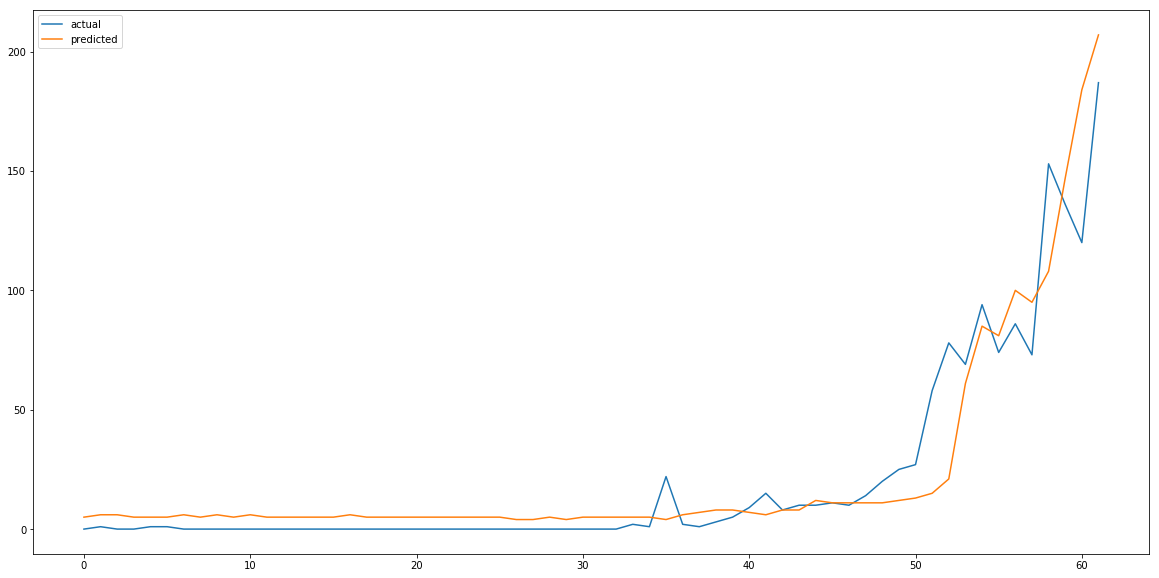

In [109]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pandas import DataFrame

'''
    How well the model predicts on training data and validation data ?
    Just for analysis, not for testing purpose
'''

def is_correct(value1, value2):
    correctness = False
    if value1 == value2:
        correctness = True
    elif value2 < 25 and abs(value1 - value2) <= 9:
        correctness = True
    elif value2 < 300 and abs(value1 - value2) <= 50:
        correctness = True
    elif value2 > 500 and abs(value1 - value2) <= 135:
        correctness = True
    return correctness

y_pred = prediction_model.predict(train_X, batch_size=batch_size)
i = 0
comparision_data = DataFrame()
correct = 0
total = 0
for x,y,actual in zip(train_X, y_pred,train_y):
    comparision_data.at[i,'Day']=i
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*SCALE_NUM_CASES)
    comparision_data.at[i,'Actual'] = (actual*SCALE_NUM_CASES)
    comparision_data.at[i,'State'] = 'Incorrect'
    if is_correct(comparision_data.at[i,'Predicted'], comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1
y_pred = model.predict(test_X, batch_size=batch_size)
for x,y,actual,p in zip(test_X, y_pred,test_y,range(62)):
    comparision_data.at[i,'Day']=i
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*SCALE_NUM_CASES)
    comparision_data.at[i,'Actual'] = (actual*SCALE_NUM_CASES)
    comparision_data.at[i,'State'] = 'Incorrect'
    if is_correct(comparision_data.at[i,'Predicted'], comparision_data.at[i,'Actual']):
        correct+=1
        comparision_data.at[i,'State'] = 'Correct'
    total+=1
    i+=1
print(round((correct/total)*100))
plt.figure(figsize=(20,10))
#plt.plot(scaler.inverse_transform(scaled))
plt.plot(comparision_data['Actual'],label='actual')
plt.plot(comparision_data['Predicted'],label='predicted')
plt.legend()
plt.show()

In [110]:
'''
    Loads testing data for testing from April 1
'''
df_test = pd.read_csv('../Timeseries-Data/test_data.csv')
columns_to_keep = ['Date','Population_Density','Min_Temp','Max_Temp','Lockdown','Num_Cases']
df_test = df_test.astype({"Population_Density":float ,"Lockdown": float,'Num_Cases':float,'Min_Temp':float,'Max_Temp':float})
df_test = df_test[columns_to_keep]
INC_FIRST = 86
i=0
prev = 0.0
for ind in reversed(df_test.index):
    df_test.at[ind,'Min_Temp'] = (df_test.at[ind,'Min_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Max_Temp'] = (df_test.at[ind,'Max_Temp'] - temp_num)/temp_deno
    df_test.at[ind,'Lockdown'] /= LOCKDOWN_SCALE
    if ind != 0:
        df_test.at[ind,'Num_Cases'] -= df_test.at[ind-1,'Num_Cases']

df_test.at[0,'Num_Cases'] = INC_FIRST
df_test['Num_Cases'] /= SCALE_NUM_CASES

df_test = df_test.set_index('Date')

df_test

,Population_Density,Min_Temp,Max_Temp,Lockdown,Num_Cases
Date,,,,,
3/25/2020,1.0,0.687500,0.875000,1.0,0.286667
3/26/2020,1.0,0.687500,0.833333,1.0,0.243333
3/27/2020,1.0,0.625000,0.708333,1.0,0.510000
3/28/2020,1.0,0.625000,0.833333,1.0,0.453333
3/29/2020,1.0,0.687500,0.833333,1.0,0.400000
3/30/2020,1.0,0.687500,0.833333,1.0,0.623333
3/31/2020,1.0,0.666667,0.854167,1.0,1.030000
4/1/2020,1.0,0.687500,0.916667,1.0,-5.450000
4/2/2020,1.0,0.687500,0.854167,1.0,0.000000


<b> PREDICTION FOR 1st April to 15th April (Unseen data for model) </b>

         Day  Predicted  Actual                State  Difference
0    1 April      302.0   424.0         Close enough       122.0
1    2 April      357.0   486.0         Close enough       129.0
2    3 April      455.0   560.0         Close enough       105.0
3    4 April      519.0   579.0         Close enough        60.0
4    5 April      560.0   605.0         Close enough        45.0
5    6 April      611.0   489.0         Close enough       122.0
6    7 April      684.0   573.0         Close enough       111.0
7    8 April      715.0   565.0  Too far from actual       150.0
8    9 April      763.0   813.0         Close enough        50.0
9   10 April      824.0   871.0         Close enough        47.0
10  11 April      866.0   854.0         Close enough        12.0
11  12 April      903.0   751.0  Too far from actual       152.0
12  13 April      949.0  1248.0  Too far from actual       299.0
13  14 April      991.0  1034.0         Close enough        43.0
14  15 April     1019.0  

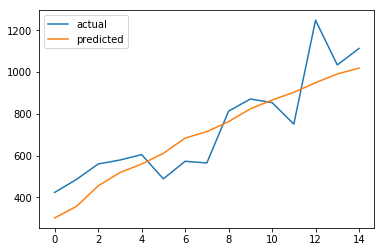

In [111]:
from sklearn.metrics import mean_squared_error
import math
i = 0
comparision_data = DataFrame()
correct = 0
total = 0
# Read data for actual number of cases
df_actual = pd.read_csv("../Timeseries-Data/test_data.csv", index_col='Date')
def is_correct(value1, value2,acceptable_range):
    correctness = False
    if value1 == value2:
        correctness = True
    elif abs(value1 - value2) <= acceptable_range:
        correctness = True
    return correctness

df_actual = df_actual['3/31/2020':]
prev_date = '3/31/2020'
correct_2 = 0
for _ in range(15):
    current_date = '4/'+str(i+1)+'/2020'
    actual = df_actual.at[current_date,'Actual_Num_Cases'] - df_actual.at[prev_date,'Actual_Num_Cases']
    prev_date = current_date
    df_partial = df_test['3/25/2020':current_date]
    df_partial_timeseries = series_to_supervised(df_partial,7,1,True)
    values = df_partial_timeseries.values
    test_x = values[-1:,:-1]
    test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
    y_pred = prediction_model.predict(test_X, batch_size=batch_size)
    y = y_pred[0]
    x = test_X[0]
    comparision_data.at[i,'Day']=str(i+1)+' April'
    if y[0] < 0.0:
        y[0] = 0.0
    comparision_data.at[i,'Predicted'] = round(y[0]*SCALE_NUM_CASES)
    comparision_data.at[i,'Actual'] = actual
    comparision_data.at[i,'State'] = 'Too far from actual'
    if is_correct(comparision_data.at[i,'Predicted'],comparision_data.at[i,'Actual'],130):
        correct+=1
        comparision_data.at[i,'State'] = 'Close enough'
    if is_correct(comparision_data.at[i,'Predicted'],comparision_data.at[i,'Actual'],150):
        correct_2+=1
    comparision_data.at[i,'Difference'] = abs(comparision_data.at[i,'Predicted'] - comparision_data.at[i,'Actual'])
    total+=1
    # Ensure that predicted value is only seen by the model, and not the actual value
    df_test.at['4/'+str(i+1)+'/2020', 'Num_Cases'] = y[0]
    i+=1

print(comparision_data)
print(round((correct/total)*100),"% accurate, assuming difference till 130 is acceptable")
print(round((correct_2/total)*100),"% accurate, assuming difference till 150 is acceptable")
# calculate root mean square error
rmse = math.sqrt(mean_squared_error(comparision_data['Actual'], comparision_data['Predicted']))
print("RMSE = ", round(rmse))
plt.plot(comparision_data['Actual'],label='actual')
plt.plot(comparision_data['Predicted'],label='predicted')
plt.legend()
plt.show()

<b> Prediction for 16th April to 30th April </b>

         Day  Predicted
15  16 April     1111.0
16  17 April     1108.0
17  18 April     1123.0
18  19 April     1184.0
19  20 April     1216.0
20  21 April     1203.0
21  22 April     1235.0
22  23 April     1241.0
23  24 April     1253.0
24  25 April     1276.0
25  26 April     1286.0
26  27 April     1289.0
27  28 April     1292.0
28  29 April     1299.0
29  30 April     1300.0


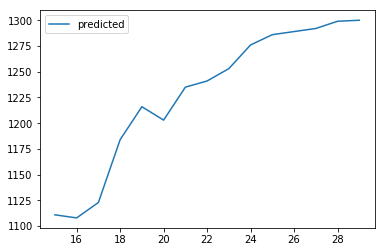

In [112]:
prediction = DataFrame()
prev_date = '3/31/2020'
for i in range(15):
    current_date = '4/'+str(i+1)+'/2020'
    df_test.at[current_date, 'Num_Cases'] = (df_actual.at[current_date,'Actual_Num_Cases'] - df_actual.at[prev_date,'Actual_Num_Cases'])/SCALE_NUM_CASES
    prev_date = current_date

prev_date = '4/15/2020'

i = 15
for _ in range(15):    
    current_date = '4/'+str(i+1)+'/2020'
    prev_date = current_date
    df_partial = df_test['4/9/2020':current_date]
    df_partial_timeseries = series_to_supervised(df_partial,7,1,True)
    values = df_partial_timeseries.values
    test_x = values[-1:,:-1]
    test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
    y_pred = prediction_model.predict(test_X, batch_size=batch_size)
    y = y_pred[0]
    x = test_X[0]
    prediction.at[i,'Day']=str(i+1)+' April'
    if y[0] < 0.0:
        y[0] = 0.0
    prediction.at[i,'Predicted'] = round(y[0]*SCALE_NUM_CASES)
    df_test.at['4/'+str(i+1)+'/2020', 'Num_Cases'] = y[0]
    i+=1

print(prediction)
plt.plot(prediction['Predicted'] ,label='predicted')
plt.legend()
plt.show()